$$\newcommand{\worth}{v}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\cdf}{\text{cdf}}
$$

# Relative Improvement Decision Making
   
The idea of relative improvement is that our personal utility is related to our relative change in society. For example, our sensitivity to an increase in salary is dependent on how it situates us relative to our peers, rather than an absolute change in position.
   
How a change in circumstance effects us, is therefore related to our context, and how resources or income are distributed throughout our community.

Firstly, we'll consider a worked example. 

As a starting example, consider the *logarithmic utility* as suggested by Daniel Bernoulli. If we are sensitive to the log of change, we can inverse engineer what our *assumption* about the underlying distribution of resources or income is.

Expected gain under logarithmic utility is 
$$
\log \worth_2 - \log \worth_1
$$
If we are interested in our relative position in the population, this implies our change in relative position is given by
$$
\cdf(\worth_2) - \cdf(\worth_1)
$$
which implies that we are assuming that the logarithm is the cumulative distribution function (CDF) of the underlying wealth distribution. To recover the probability density function (PDF) we differentiate the CDF and recover,
$$
p(\worth) = \frac{1}{\worth}
$$
which is not a correctly normalized distribution, but is often used as an improper density covering the positive half space, i.e. if we don't have knowledge of the underlying density then defining the Gamma density as,
$$
\gammaDist{\worth}{a}{b} = \frac{b^a \worth^{a-1}e^{-b\worth}}{\Gamma(a)}
$$
we can take the limit as $a\rightarrow 0$ and $b\rightarrow 0$ and recover the improper prior over $\worth$ of $\frac{1}{\worth}$ as suggested by Daniel Bernoulli's logarithmic utility.

Given our starting example, which reverse engineered an existing marginal utility, we can now start from a more usual assumption of the distribution of resource or income, the Pareto distribution, and engineer directly a utility based on the idea of *relative improvement*. 

The Pareto distribution is a density proposed to model the wealth or income in a population. 
$$
p(\worth) = \frac{\alpha \worth_m^\alpha}{\worth^{\alpha+1}}
$$
The CDF for the Pareto density is given by
$$
\cdf(\worth) = 1 - \left(\frac{\worth_m}{\worth}\right)^\alpha
$$
So the marginal utility is given by
$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha-\left(\frac{\worth_m}{\worth_2}\right)^\alpha
$$




$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha-\left(\frac{\worth_m}{\worth_2}\right)^\alpha
$$
$$
m(\worth_1, \worth_2) = \worth_m^\alpha\frac{\worth_2^\alpha - \worth_1^\alpha}{\left(\worth_1\worth_2\right)^\alpha}
$$
$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha\frac{\worth_2^\alpha - \worth_1^\alpha}{\worth_2^\alpha}
$$
$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha\frac{(\worth_1 + \delta\worth)^\alpha - \worth_1^\alpha}{(\worth_1+\delta\worth)^\alpha}
$$

For the most exterme case $\alpha=1$ we have
$$
m(\worth_1, \worth_2) = \worth_m\frac{\worth_2 - \worth_1}{\worth_1\worth_2}
$$
considering $\delta \worth$
$$
m(\delta\worth) = \frac{\worth_m}{\worth_1}\frac{\delta \worth}{(\delta\worth + \worth_1)}
$$

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


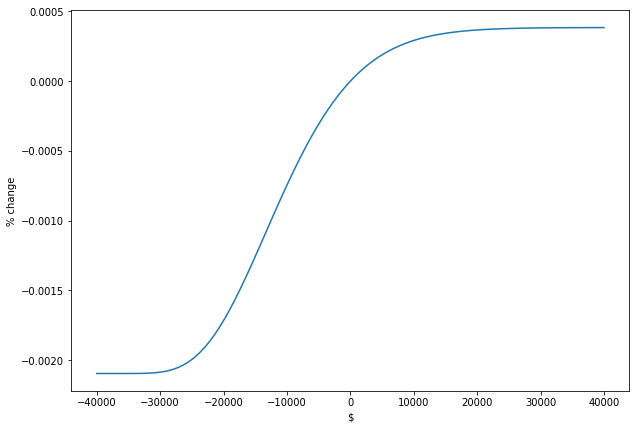

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 7))
vm = 1
v1 = 40000
alpha = 20
a=9
b=0.0003
dv = np.linspace(-40000, 40000, 100)
m = np.exp(alpha*np.log(vm/v1) - alpha*np.log(dv+v1))*((v1+dv)**alpha-v1**alpha)
m2 = np.log(v1+dv)-np.log(v1)
m3 = (gammainc(a, b*(v1+dv))-gammainc(a, b*v1))/gamma(a)
#ax.plot(dv, m2*100)
plt.ylabel('% change')
plt.xlabel('$')
#ax.plot(dv, m*100)
_ = ax.plot(dv, m3*100)

In [76]:
gamma(0.0000001)

9999999.422784435

In [80]:
from scipy.special import gammainc, gamma

In [79]:
gammainc?

In [52]:
gamma(1)

1.0